In [4]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [5]:
# top 40 dax companies 
dax_assets = {
               'DAX': '^GDAXI',
               'Linde': 'LIN',
               'SAP': 'SAP',
               'Deutsche Telekom': 'DTE.DE',
               'Volkswagen': 'VOW3.DE',
               'Siemens': 'SIE.DE',
               'Merck': 'MRK.DE',
               'Airbus': 'AIR.PA',
               'Mercedes Benz': 'MBG.DE', 
               'Bayer': 'BAYZF',
               'BMW': 'BMW.DE',
               'Siemens Healthineers': 'SHL.DE',
               'Deutsche Post': 'DPW.DE',
               'BASF': 'BAS.DE',
               'Münchner Rück': 'MUV2.DE',
               'Infineon': 'IFX.DE',
               'Deutsche Börse': 'DB1:DE',
               'RWE': 'RWE.DE',
               'Henkel': 'HEN3.DE',
               'Adidas': 'ADS.DE',
               'Sartorius': 'SRT.DE',
               'Beiersdorf': 'BEI.DE',
               'Porsche': 'PAH3.DE',
               'E.ON': 'EOAN.DE',
               'Deutsche Bank': 'DB',
               'Vonovia': 'VNA.DE',
               'Fresenius': 'FRE.DE',
               'Symrise': 'SY1.DE',
               'Continental': 'CON.DE',
               'Delivery Hero': 'DHER.F',
               'Brenntag': 'BNR.DE',
               'Qiagen': 'QGEN',
               'Fresenius Medical Care': 'FMS',
               'Siemens Energy': 'ENR.F',
               'HeidelbergCement': 'HEI.DE',
               'Puma': 'PUM.DE',
               'MTU Aero Engines': 'MTX.DE',
               'Covestro': '1COV.F',
               'Zalando': 'ZAL.DE',
               'HelloFresh': 'HFG.DE'
            }

In [6]:
dax_assets = {
               'Microsoft': 'MSFT',
               'Tesla': 'TSLA',
               'Google': 'GOOG',
               'Apple': 'AAPL',
               'IBM': 'IBM',
               'Amazon': 'AMZN',
               'Samsung': 'SSUN.F',
               'Intel': 'INTC',
                }

In [7]:
# utils
def find_stock_name(stock_ticker:str)->str:
    """return stock or asset name given the stock/asset ticker name"""
    for key, val in dax_assets.items():
        if val == stock_ticker:
            return key

In [8]:
dax_top_40_companies = list(dax_assets.keys())#[1:]
dax_top_40_tickername = list(dax_assets.values())#[1:]

In [9]:
start_date = datetime(2019,1,1)
str(start_date.year)+'-'+str(start_date.month)+'-'+str(start_date.day)

'2019-1-1'

In [10]:
start_date = '2010-1-1'
end_date = '2022-9-15'
na_percentage = 0.6 # at least x percent rows must be none-nas

In [11]:
# download DAX top40
df = yf.download(dax_top_40_tickername, 
                start=start_date, 
                end=end_date,
                progress=True)
# drop columns
df = df['Close']
# get actual stock names
stock_names = [find_stock_name(stock_ticker) for stock_ticker in df.columns]
# rename columns
df.columns = stock_names
# make sure the index is datetime format
df.index = pd.to_datetime(df.index)
# drop nas
datetimeFormat = '%Y-%m-%d'
time_delta = datetime.strptime(end_date, datetimeFormat) - datetime.strptime(start_date,datetimeFormat)
df.dropna(axis=1, thresh=int(time_delta.days * na_percentage), inplace=True)
# show data
df.head()

[*********************100%***********************]  8 of 8 completed


,Apple,Amazon,Google,IBM,Intel,Microsoft,Samsung,Tesla
Date,,,,,,,,
2009-12-31,7.526071,6.7260,15.441621,125.143402,20.400000,30.480000,NaN,NaN
2010-01-04,7.643214,6.6950,15.610239,126.625237,20.879999,30.950001,158.399994,NaN
2010-01-05,7.656429,6.7345,15.541497,125.095604,20.870001,30.959999,163.300003,NaN
2010-01-06,7.534643,6.6125,15.149715,124.282982,20.799999,30.770000,163.300003,NaN
2010-01-07,7.520714,6.5000,14.797037,123.852776,20.600000,30.450001,158.850006,NaN


In [12]:
# check if any NAs 
df.isna().sum()

Apple         82
Amazon        82
Google        82
IBM           82
Intel         82
Microsoft     82
Samsung       56
Tesla        205
dtype: int64

In [13]:
df = df.interpolate(method='time', limit=7).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)

In [14]:
# check if any NAs left
df.isna().sum()

Apple          0
Amazon         0
Google         0
IBM            0
Intel          0
Microsoft      0
Samsung        0
Tesla        119
dtype: int64

In [15]:
df.head()

,Apple,Amazon,Google,IBM,Intel,Microsoft,Samsung,Tesla
Date,,,,,,,,
2009-12-31,7.526071,6.7260,15.441621,125.143402,20.400000,30.480000,158.399994,NaN
2010-01-04,7.643214,6.6950,15.610239,126.625237,20.879999,30.950001,158.399994,NaN
2010-01-05,7.656429,6.7345,15.541497,125.095604,20.870001,30.959999,163.300003,NaN
2010-01-06,7.534643,6.6125,15.149715,124.282982,20.799999,30.770000,163.300003,NaN
2010-01-07,7.520714,6.5000,14.797037,123.852776,20.600000,30.450001,158.850006,NaN


In [12]:
# plot daily portfolio worth
fig = px.line(df,
              y="Linde", 
              title='Linde')
fig.show()

# Predict Single Stock Price using FB Neural Prophet

In [13]:
from neuralprophet import NeuralProphet

In [14]:
df_stock = df[['Linde']].copy()
df_stock = df_stock.rename(columns={'Linde':'y', 'Date':'ds'})
df_stock['ds'] = df_stock.index
df_stock = df_stock.reset_index()
df_stock = df_stock[['ds','y']]
df_stock

,ds,y
0,2009-12-31,80.309998
1,2010-01-04,81.559998
2,2010-01-05,80.040001
3,2010-01-06,80.750000
4,2010-01-07,80.959999
...,...,...
3281,2022-09-08,283.910004
3282,2022-09-09,287.029999
3283,2022-09-12,294.510010
3284,2022-09-13,285.579987


In [15]:
METRICS = ['MAE', 'RMSE']
params = {"n_forecasts": 180, "n_lags": 30}

In [16]:
# instantiate model object
m = NeuralProphet(**params)

In [17]:
# set up cross validation
folds = m.crossvalidation_split_df(df_stock, freq="D", k=3, fold_pct=0.20, fold_overlap_pct=0.5)

metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    train = m.fit(df=df_train, freq="D")
    test = m.test(df=df_test)
    metrics_train = metrics_train.append(train[METRICS].iloc[-1])
    metrics_test = metrics_test.append(test[METRICS].iloc[-1])

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 1355 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 1355 NaN values in column y were auto-imputed.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.964% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 147
 96%|█████████▌| 129/135 [00:02<00:00, 60.85it/s]
INFO - (NP.utils_torch.lr_range

In [18]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

,MAE,RMSE
mean,29.494182,34.190606
std,18.463166,19.674562
min,14.607165,19.125257
max,50.154007,56.449612


In [19]:
# make a two fold validation
m = NeuralProphet(**params)
df_train, df_val = m.split_df(df_stock, freq='D', valid_p=0.25)
#metrics = m.fit(df_train, validation_df=df_val, progress="plot-all")
metrics = m.fit(df_train, validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 1355 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 1355 NaN values in column y were auto-imputed.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 139
 97%|█████████▋| 133/137 [00:02<00:00, 59.83it/s]
INFO - (NP.utils_torch.lr_range_test) -

In [20]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.865664,111.781615,140.260310,0.0,0.910065,116.060973,148.216877
1,0.567104,83.452534,103.898339,0.0,0.549013,82.199409,101.966921
2,0.377622,64.772367,80.366659,0.0,0.367759,64.070361,79.336920
3,0.187688,43.542889,53.812826,0.0,0.207048,45.977044,57.406256
4,0.053412,22.695583,27.817683,0.0,0.070136,25.281947,32.742328
...,...,...,...,...,...,...,...
134,0.001260,3.321317,4.371400,0.0,0.197588,46.977795,54.971580
135,0.001260,3.320446,4.374038,0.0,0.204556,47.867948,55.952829
136,0.001250,3.306490,4.360632,0.0,0.203581,47.756487,55.816263
137,0.001248,3.299886,4.355177,0.0,0.203235,47.718929,55.766480


In [21]:
#m.plot(metrics)

In [16]:
# train model on all data
m = NeuralProphet(**params)

# fit model
metrics = m.fit(df_stock)

# Predictions
future = m.make_future_dataframe(df=df_stock, periods=365, n_historic_predictions=len(df_stock)) #we need to specify the number of days in future
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.forecaster.__handle_missing_data) - 29 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 30 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 140
100%|██████████| 137/137 [00:02<00:00, 61.38it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.15E-01, min: 3.62E-02
100%|██████████| 137/137 [00:02<00:00, 65.41it/s]
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.15E-01, min

In [17]:
forecast.head()

,ds,y,yhat1,residual1,yhat2,residual2,yhat3,residual3,yhat4,residual4,...,ar174,ar175,ar176,ar177,ar178,ar179,ar180,trend,season_yearly,season_weekly
0,2009-12-31,80.309998,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,2010-01-01,80.934998,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
2,2010-01-04,81.559998,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,2010-01-05,80.040001,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
4,2010-01-06,80.750000,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [18]:
# plot the data
fig = go.Figure()
fig = fig.add_trace(go.Line(x = forecast['ds'],
                            y = forecast['y'], 
                            name = 'price'))

fig = fig.add_trace(go.Line(x = forecast['ds'],
                            y = forecast['yhat180'], 
                            name = 'forecast'))

fig = fig.add_trace(go.Line(x = forecast['ds'],
                            y = forecast['trend'], 
                            name = 'trend', 
                            line=dict(color='black', width=4)))       
fig.show()

WARNING - (py.warnings._showwarnmsg) - c:\Users\Nutzer\anaconda3\envs\stock_app\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.





WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


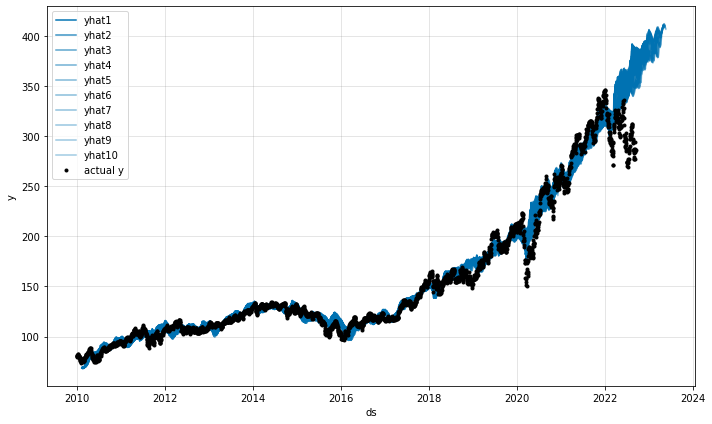

In [19]:
# plot forecast
fig_forecast = m.plot(forecast)

# Portfolio Optimization using Monte-Carlo Simulation

In [20]:
#m.plot_components(forecast)
#plt.show()

In [16]:
# normalized daily returns
def normalized_returns(df):
    return np.log(1 + df.pct_change(periods=1).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)) 

# create weights
def weight_creator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

# calculate portfolio return
def portfolio_returns(df, weights):
    return np.dot(df.mean(), weights)

# calculate portfolios standard deviation
def portfolio_std(df, weights):
    return (np.dot(np.dot(df.cov(), weights), weights))**(1/2)*np.sqrt(250)

def portfolio_sharp_ratio(portfolio_return:float, portfolio_std:float, rfr:float)->float:
    """Calculate the sharp ratio for a given portfolio df and a given risk-free-return "rfr"."""
    ntd = 250 #  number of trading days
    return np.divide(portfolio_return - rfr/ntd, portfolio_std) 

In [22]:
# plot daily portfolio worth
fig = px.line(normalized_returns(df), 
              y="Linde", 
              title='Linde: Normalized Returns')
fig.show()

In [17]:
# testing the functions
df_returns = normalized_returns(df)
weights = weight_creator(df_returns)
sdev = portfolio_std(df_returns, weights)
returns = portfolio_returns(df_returns, weights)

print('portfolio return: {:.5f}'.format(returns))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.00041
portfolio standard deviation: 0.19


In [18]:

def sim2weights_df(weights:list, stock_names:list)->pd.DataFrame:
    """Make dataframe given the portfolios´s weights from the simulations.  
    """
    # initialize weights dataframe with the weights from first simulation
    df_weights = pd.DataFrame(weights[0]).T
    for weights in weights[1:]:
        df_weights = df_weights.append(pd.DataFrame(weights).T, ignore_index=True) 
    # rename columns
    df_weights.columns = stock_names
    return df_weights

def sim2kpi_df(sim_returns:list, sim_standard_deviations:list, sim_sharp_ratios:list)->pd.DataFrame:
    """Generate key performance indicator dataframe from simulation returns, simulation standard deviations and simulation sharp ratios."""
    return pd.DataFrame(data={'portfolio return': sim_returns, 
                               'portfolio standard dev': sim_standard_deviations, 
                               'portfolio sharp ratio': sim_sharp_ratios})

def sim2_df(sim_returns:list, sim_standard_deviations:list, sim_sharp_ratios:list, weights:list, stock_names:list)->pd.DataFrame:
    """Save monte-carlo simulation results in dataframe"""
    sim_weights_df = sim2weights_df(weights, stock_names)
    sim_kpi_df = sim2kpi_df(sim_returns, sim_standard_deviations, sim_sharp_ratios) 
    return sim_weights_df.join(sim_kpi_df)

In [19]:
# Monte-Carlo Simulation
w = []
returns = []
stds = []
srs = []

# caclulate normalized daily returns 
df_returns = normalized_returns(df)

for n in range(1000):
    weights = weight_creator(df_returns)
    portfolio_return = portfolio_returns(df_returns, weights)
    portfolio_stdev = portfolio_std(df_returns, weights) 
    portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr=0.02)
    w.append(weights)
    returns.append(portfolio_return)
    stds.append(portfolio_stdev)
    srs.append(portfolio_sr)

In [20]:
# save simulation results in dataframe
stock_names = list(df.columns)
df_simulation = sim2_df(returns, stds, srs, w, stock_names)
df_simulation.head()

,Apple,Amazon,Google,IBM,Intel,Microsoft,Samsung,Tesla,portfolio return,portfolio standard dev,portfolio sharp ratio
0,0.097298,0.160514,0.099058,0.155616,0.054278,0.133907,0.157944,0.141386,0.000708,0.210244,0.002987
1,0.066763,0.093296,0.234269,0.127079,0.125005,0.213384,0.020725,0.119478,0.000647,0.216263,0.002624
2,0.121968,0.111750,0.165786,0.082181,0.063886,0.171036,0.140188,0.143204,0.000744,0.214710,0.003094
3,0.113803,0.001504,0.203507,0.201415,0.125327,0.160209,0.051120,0.143115,0.000613,0.211714,0.002515
4,0.205184,0.095048,0.149322,0.146616,0.028997,0.118752,0.185434,0.070647,0.000664,0.198767,0.002938


In [21]:
# plot returns vs risk
fig = px.scatter(x=df_simulation['portfolio standard dev'], 
                 y=df_simulation['portfolio return']*100,
                 color=df_simulation['portfolio sharp ratio']*100,
                 labels={'y': 'return [%]', 'x': 'standard deviation', 'color': 'sharp ratio'},
                 width=600, 
                 title='Portfolio´s Returns and Risks Monte-Carlo Simulation')
fig.show()

In [22]:
# find mimimum risk (i.e. variance) portfolio
def min_variance_portfolio(df_simulation:pd.DataFrame, stocknames:list)->pd.DataFrame:
    """Get weights of the portfolio with minimal variance or risk. Input dataframe of the simulation and a list of the stock names"""
    return df_simulation.sort_values(by='portfolio standard dev')[stocknames].iloc[0,:].values

In [23]:
weights_opt = min_variance_portfolio(df_simulation, stock_names)

In [24]:
# testing the functions
df_returns = normalized_returns(df)
sdev = portfolio_std(df_returns, weights_opt)
returns = portfolio_returns(df_returns, weights_opt)

print('portfolio return: {:.5f}'.format(returns*100))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.03969
portfolio standard deviation: 0.19


In [25]:
# find optimal portfolio for given risk

# define risk bounds i.e. maximal acceptable risk
risk_bounds = (0, 0.2)
risk_indices = df_simulation['portfolio standard dev'].between(risk_bounds[0], risk_bounds[1])

# find optimal weights
weights_opt = df_simulation[risk_indices].sort_values(by='portfolio return', ascending=False)[stock_names].iloc[0,:].values
weights_opt

array([0.20518358, 0.09504802, 0.14932198, 0.14661617, 0.02899693,
       0.11875209, 0.18543386, 0.07064736])

In [26]:
# testing the functions
df_returns = normalized_returns(df)
sdev = portfolio_std(df_returns, weights_opt)
returns = portfolio_returns(df_returns, weights_opt)

print('portfolio return: {:.5f}'.format(returns*100))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.06639
portfolio standard deviation: 0.20


# Linear Optimization Approach

In [ ]:
# the sum of all the weights = 1, which can be expressed by a linear constraint: check the scipy docs:
# https://docs.scipy.org/doc/scipy/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize

In [27]:
from scipy.optimize import Bounds, LinearConstraint, minimize
import matplotlib.pyplot as plt

In [28]:
# define lower and upper bounds of the weights
bounds = Bounds(lb=np.repeat(0,len(stock_names)), ub=np.repeat(1,len(stock_names)))
# define linear constraint
constraint_mat = np.repeat(1,len(stock_names))
linear_constraint = LinearConstraint(A=constraint_mat, lb=1, ub=1)

In [29]:
# caclulate normalized daily returns 
df_returns = normalized_returns(df)
# initialize random weights
weights = weight_creator(df_returns)
# calc portfolio´s sharp ratio
portfolio_return = portfolio_returns(df_returns, weights)
portfolio_stdev = portfolio_std(df_returns, weights) 
portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr=0.02)
print('portfolios sharp ratio: {}'.format(portfolio_sr))

portfolios sharp ratio: 0.002673100624727491


In [30]:
def obj_fun(w0:np.array):
    """calc sharp ratio for given portfolio df and given weights"""
    # calc portfolio´s sharp ratio
    rfr=0.02 # set risk free rate
    portfolio_return = portfolio_returns(df_returns, weights)
    portfolio_stdev = portfolio_std(df_returns, weights) 
    portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr)
    return 1/portfolio_sr

`gtol` termination condition is satisfied.
Number of iterations: 13, function evaluations: 45, CG iterations: 4, optimality: 6.84e-09, constraint violation: 1.11e-16, execution time: 0.053 s.


c:\Users\Nutzer\anaconda3\envs\stock_app\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.



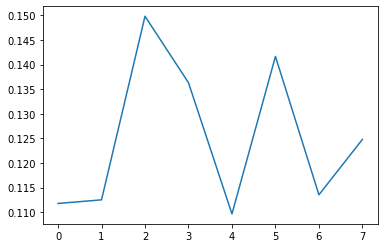

In [53]:
# caclulate normalized daily returns 
df_returns = normalized_returns(df)
# initialize random weights
w0 = weight_creator(df_returns)

# minimize cost function or objective function
res = minimize(obj_fun, 
               w0, 
               method='trust-constr',
               constraints=[linear_constraint],
               options={'verbose': 1},
               bounds=bounds)

plt.plot(res.x)

In [54]:
# use optimized weights
weights = res.x
# calc portfolio´s sharp ratio
portfolio_return = portfolio_returns(df_returns, weights)
portfolio_stdev = portfolio_std(df_returns, weights) 
portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr=0.02)
print('portfolios sharp ratio: {}'.format(portfolio_sr*100))

portfolios sharp ratio: 0.28142882868598706


(array([  2.,   3.,  13.,  28., 100., 166., 239., 243., 158.,  48.]),
 array([0.12406174, 0.14670405, 0.16934635, 0.19198865, 0.21463095,
        0.23727326, 0.25991556, 0.28255786, 0.30520016, 0.32784247,
        0.35048477]),
 <BarContainer object of 10 artists>)

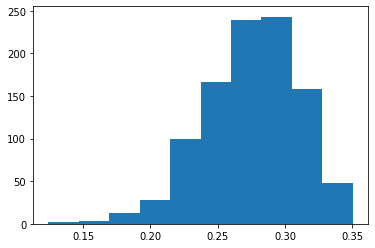

In [56]:
# compare with simulated distribution
plt.hist(df_simulation['portfolio sharp ratio']*100) 